In [52]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
import pandas as pd
data = pd.read_csv('cleaned_tweets.csv')

In [54]:
data.head(5)

,Unnamed: 0,id,entity,sentiment,tweet
0,0,2401,Borderlands,Positive,"['im', 'get', 'borderland', 'murder']"
1,1,2401,Borderlands,Positive,"['come', 'border', 'kill']"
2,2,2401,Borderlands,Positive,"['im', 'get', 'borderland', 'kill']"
3,3,2401,Borderlands,Positive,"['im', 'come', 'borderland', 'murder']"
4,4,2401,Borderlands,Positive,"['im', 'get', 'borderland', '2', 'murder']"


In [55]:
print(data.shape)
print(data.info())

(43013, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43013 entries, 0 to 43012
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  43013 non-null  int64 
 1   id          43013 non-null  int64 
 2   entity      43013 non-null  object
 3   sentiment   43013 non-null  object
 4   tweet       43013 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.6+ MB
None


In [56]:
data.sentiment.unique()

array(['Positive', 'Negative'], dtype=object)

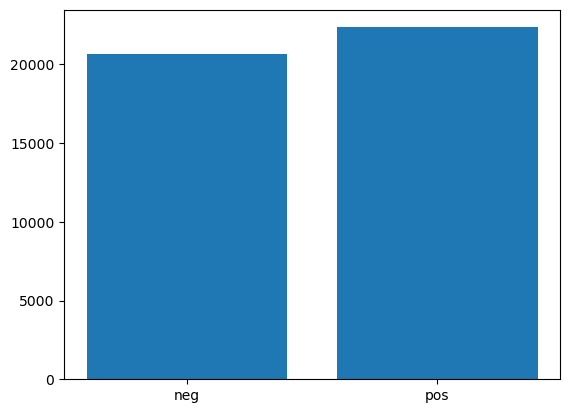

In [46]:
classes = data.sentiment.unique()
counts = []
for i in classes:
    count= len(data[data.sentiment==i])
    counts.append(count)
plt.bar(['neg','pos'],counts)
plt.show()

In [47]:
#sb.pairplot(data)

In [57]:
x = data.tweet.values
y = data.sentiment.values


In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42,test_size= 0.2)


In [50]:
'''print(x_train.shape)
print(x_test.shape)
print x_test.describe()
print (x_train.dtype)
print (y_train)'''

In [51]:
#x1 =data1.drop(['sentiment'], axis=1)
#x1.describe()

In [59]:

vectorizer = CountVectorizer()
vectorizer.fit(x_train)

vectorizer.fit(x_test)
x_train = vectorizer.transform(x_train)
x_test = vectorizer.transform(x_test)


In [61]:
print("before vec; ", x_train[0], "  after vec : " ,x_train[0])

before vec;    (0, 2820)	1
  (0, 3516)	1
  (0, 3961)	1
  (0, 5128)	1
  (0, 5784)	1
  (0, 6002)	1
  (0, 6014)	1
  (0, 9208)	1 after vec :    (0, 2820)	1
  (0, 3516)	1
  (0, 3961)	1
  (0, 5128)	1
  (0, 5784)	1
  (0, 6002)	1
  (0, 6014)	1
  (0, 9208)	1


In [75]:
''' import re
d= ",.12/8-3:0 "
"[+\|- join(d)+]"

# clean up the string
s = x_train[0]
s = ' '.join(w for w in re.split("["+ "\\".join(d)+"]", s) if w) 

for i in s.split():
    if len(i)>1: 
        print(i, vectorizer.vocabulary_[i.lower()]) '''



' import re\nd= ",.12/8-3:0 "\n"[+\\|- join(d)+]"\n\n# clean up the string\ns = x_train[0]\ns = \' \'.join(w for w in re.split("["+ "\\".join(d)+"]", s) if w) \n\nfor i in s.split():\n    if len(i)>1: \n        print(i, vectorizer.vocabulary_[i.lower()]) '

In [69]:
classifier = LogisticRegression (max_iter=1000)
classifier.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [70]:
score = classifier.score(x_test, y_test)
print("accuracy", score)

accuracy 0.8935255143554574


In [73]:
y_pred =  classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred, labels = data.sentiment.unique())
data_cm =  pd.DataFrame(cm, index = data.sentiment.unique(), columns = data.sentiment.unique()) 
data_cm

,Positive,Negative
Positive,3638,498
Negative,418,4049


In [80]:
data_cm_percentage = data_cm.copy()
for i in data_cm_percentage:
    data_cm_percentage[i] = data_cm_percentage[i] /data_cm_percentage[i].sum()
    
data_cm_percentage


,Positive,Negative
Positive,0.896943,0.109523
Negative,0.103057,0.890477


In [81]:
x_test

<8603x9394 sparse matrix of type '<class 'numpy.int64'>'
	with 85734 stored elements in Compressed Sparse Row format>

In [96]:
tweet = 'well done'
vectTweet =  vectorizer.transform(np.array([tweet ])) #vectorize the tweet using the vectorizer 
prediction = classifier.predict(vectTweet) #to predict the class of the tweet 
print('Tweet is','positive' if prediction[0]== "Positive" else 'negative')
      

Tweet is positive


In [28]:
'''
# Select the categorical columns that you want to one-hot encode
categorical_columns = ['entity']

# Use the get_dummies() method to one-hot encode the categorical columns
data1 = pd.get_dummies(data, columns=categorical_columns)'''

In [32]:
'''y= data1['sentiment'] #dependent variable is Decision
x= data1.drop(['sentiment','tweet'], axis=1)
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 42,test_size= 0.2)'''

In [36]:
x_train

<34410x9394 sparse matrix of type '<class 'numpy.int64'>'
	with 320887 stored elements in Compressed Sparse Row format>

In [37]:
'''modelLogistic = LogisticRegression()
modelLogistic.fit(x_train,y_train)'''

/Users/sanjanareddy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
modelLogistic

LogisticRegression()

In [39]:
'''row_5 = data.loc[964]
print(row_5)'''

Unnamed: 0                                                 1543
id                                                         2670
entity                                              Borderlands
sentiment                                              Negative
tweet         ["i'm", 'boarderland', '3', 'turn', 'right', '...
Name: 964, dtype: object


In [17]:
'''row_51 = data.loc[963]
print(row_51)'''

Unnamed: 0                                                 1542
id                                                         2670
entity                                              Borderlands
sentiment                                              Negative
tweet         ["i'm", 'unabl', 'access', 'forum', 'figur', '...
Name: 963, dtype: object


In [38]:
'''x_train.shape, x_test.shape, y_train.shape, y_test.shape'''

((34410, 34), (8603, 34), (34410,), (8603,))

KeyError: 'sentiment'